# Deep Learning Project Using LGBM, Multilayer Autencoder, and Multi Layer Perceptron

### Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv("NF-ToN-IoT-v2.csv")

### Exploratory Data 

In [4]:
df.columns.tolist()

['IPV4_SRC_ADDR',
 'L4_SRC_PORT',
 'IPV4_DST_ADDR',
 'L4_DST_PORT',
 'PROTOCOL',
 'L7_PROTO',
 'IN_BYTES',
 'IN_PKTS',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'FLOW_DURATION_MILLISECONDS',
 'DURATION_IN',
 'DURATION_OUT',
 'MIN_TTL',
 'MAX_TTL',
 'LONGEST_FLOW_PKT',
 'SHORTEST_FLOW_PKT',
 'MIN_IP_PKT_LEN',
 'MAX_IP_PKT_LEN',
 'SRC_TO_DST_SECOND_BYTES',
 'DST_TO_SRC_SECOND_BYTES',
 'RETRANSMITTED_IN_BYTES',
 'RETRANSMITTED_IN_PKTS',
 'RETRANSMITTED_OUT_BYTES',
 'RETRANSMITTED_OUT_PKTS',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'NUM_PKTS_UP_TO_128_BYTES',
 'NUM_PKTS_128_TO_256_BYTES',
 'NUM_PKTS_256_TO_512_BYTES',
 'NUM_PKTS_512_TO_1024_BYTES',
 'NUM_PKTS_1024_TO_1514_BYTES',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MAX_OUT',
 'ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'DNS_QUERY_ID',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'FTP_COMMAND_RET_CODE',
 'Label',
 'Attack']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940496 entries, 0 to 16940495
Data columns (total 45 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   IPV4_SRC_ADDR                object 
 1   L4_SRC_PORT                  int64  
 2   IPV4_DST_ADDR                object 
 3   L4_DST_PORT                  int64  
 4   PROTOCOL                     int64  
 5   L7_PROTO                     float64
 6   IN_BYTES                     int64  
 7   IN_PKTS                      int64  
 8   OUT_BYTES                    int64  
 9   OUT_PKTS                     int64  
 10  TCP_FLAGS                    int64  
 11  CLIENT_TCP_FLAGS             int64  
 12  SERVER_TCP_FLAGS             int64  
 13  FLOW_DURATION_MILLISECONDS   int64  
 14  DURATION_IN                  int64  
 15  DURATION_OUT                 int64  
 16  MIN_TTL                      int64  
 17  MAX_TTL                      int64  
 18  LONGEST_FLOW_PKT             int64  
 19

In [6]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,192.168.1.193,49235,192.168.1.33,4444,6,0.0,155392,202,34552,149,...,45555,4805,0,0,0,0,0,0,1,ransomware
1,192.168.1.193,49228,192.168.1.152,1880,6,0.0,1600,40,35741,65,...,16425,237,0,0,0,0,0,0,0,Benign
2,192.168.1.152,0,192.168.1.193,0,1,0.0,212,2,0,0,...,0,0,771,3,0,0,0,0,0,Benign
3,192.168.1.169,65317,239.255.255.250,1900,17,0.0,165,1,0,0,...,0,0,0,0,0,0,0,0,0,Benign
4,192.168.1.79,60766,192.168.1.255,15600,17,0.0,63,1,0,0,...,0,0,0,0,0,0,0,0,0,Benign


In [7]:
df.describe()

c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
count,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,...,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07
mean,4.335412e+04,9.282269e+03,7.615534e+00,1.377321e+01,7.263503e+02,6.359542e+00,8.366019e+02,3.216062e+00,1.279886e+01,9.489224e+00,...,5.070125e-01,1.064363e+04,1.036421e+04,4.255479e+02,1.662295e+00,4.659713e+03,1.544335e+00,4.119134e+03,1.473166e+00,6.399474e-01
std,1.517270e+04,1.685280e+04,3.925834e+00,3.202067e+01,1.433178e+05,5.091666e+02,1.017853e+05,2.580863e+02,1.128540e+01,1.091408e+01,...,1.057214e+02,1.354493e+04,1.801608e+04,4.087310e+03,1.596605e+01,1.350202e+04,8.668465e+00,4.734344e+04,2.579710e+01,4.800153e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.732400e+04,8.000000e+01,6.000000e+00,0.000000e+00,4.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,1.024000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.577000e+04,4.430000e+02,6.000000e+00,0.000000e+00,5.200000e+01,1.000000e+00,4.000000e+01,1.000000e+00,1.700000e+01,2.000000e+00,...,0.000000e+00,1.024000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,5.421800e+04,8.080000e+03,6.000000e+00,7.000000e+00,2.760000e+02,4.000000e+00,1.800000e+02,3.000000e+00,2.200000e+01,1.800000e+01,...,0.000000e+00,2.920000e+04,2.896000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553500e+04,6.553500e+04,5.800000e+01,2.480000e+02,3.019262e+08,4.692810e+05,1.644688e+08,4.109030e+05,2.230000e+02,2.230000e+02,...,2.009840e+05,6.553500e+04,6.553500e+04,6.528600e+04,2.550000e+02,6.553500e+04,2.550000e+02,6.048000e+06,5.530000e+02,1.000000e+00


C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_19472\1423695141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attack', data=df, palette='pastel')


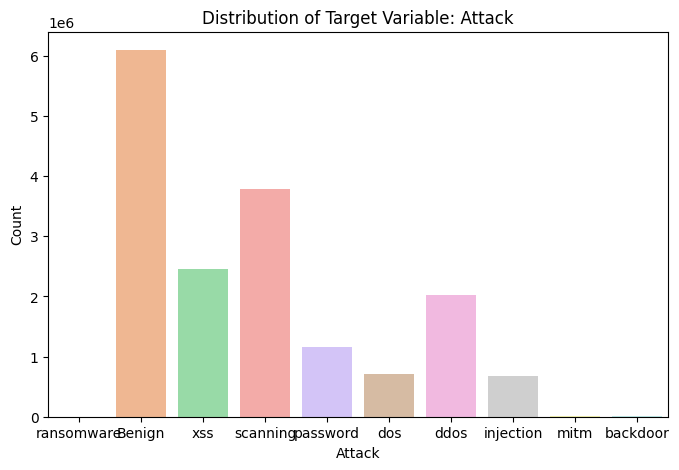

In [11]:
# Analyze target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Attack', data=df, palette='pastel')
plt.title("Distribution of Target Variable: Attack")
plt.xlabel("Attack")
plt.ylabel("Count")
plt.show()

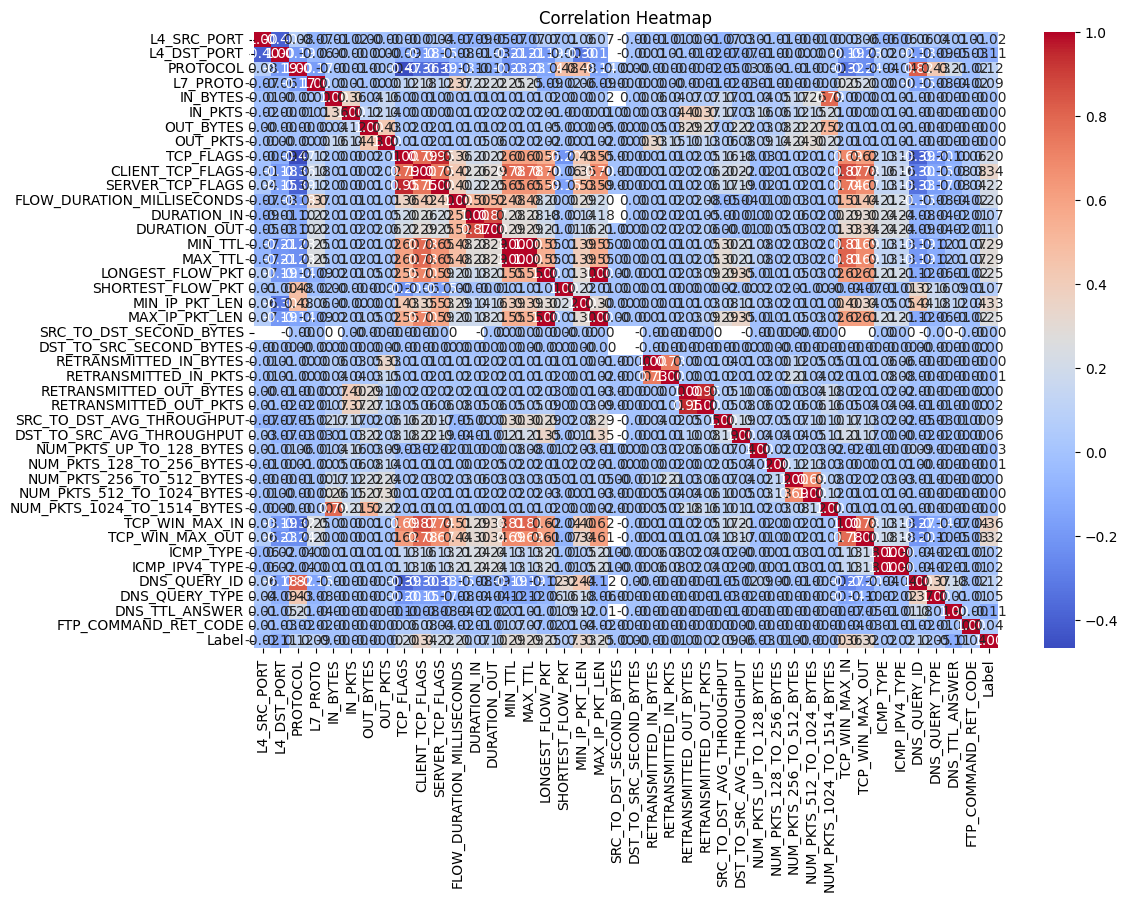

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Grouping Attack (as target) and See the Distribution

In [8]:
grouped = df.groupby('Attack').size().reset_index(name='Counts')
print(grouped)

       Attack   Counts
0      Benign  6099469
1    backdoor    16809
2        ddos  2026234
3         dos   712609
4   injection   684465
5        mitm     7723
6    password  1153323
7  ransomware     3425
8    scanning  3781419
9         xss  2455020


### Manually Downsampling 

In [ ]:
desired_count = 3425

downsampled = (
    df.groupby('Attack', group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), desired_count), random_state=42))
)

print(downsampled['Attack'].value_counts())

Attack
Benign        3425
backdoor      3425
ddos          3425
dos           3425
injection     3425
mitm          3425
password      3425
ransomware    3425
scanning      3425
xss           3425
Name: count, dtype: int64


C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_5228\189935581.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), desired_count), random_state=42))


In [ ]:
downsampled

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
6307518,192.168.1.31,58622,192.168.1.180,3766,6,0.000,44,1,0,0,...,1024,0,0,0,0,0,0,0,0,Benign
646327,192.168.1.30,55209,192.168.1.195,3784,6,0.000,44,1,0,0,...,1024,0,0,0,0,0,0,0,0,Benign
3984158,192.168.1.30,49572,192.168.1.180,427,6,0.000,44,1,0,0,...,1024,0,0,0,0,0,0,0,0,Benign
640143,192.168.1.32,50040,192.168.1.180,8084,6,0.000,44,1,0,0,...,1024,0,0,0,0,0,0,0,0,Benign
1758868,192.168.1.31,44466,192.168.1.180,4006,6,0.000,44,1,0,0,...,1024,0,0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726506,192.168.1.32,32844,18.194.169.124,80,6,7.000,1867,7,1234,4,...,29200,26847,0,0,0,0,0,0,1,xss
10100082,192.168.1.39,38394,192.168.1.195,80,6,7.000,691,6,1494,5,...,29200,65535,0,0,0,0,0,0,1,xss
10035123,192.168.1.35,50863,192.168.1.1,53,17,0.000,68,1,68,1,...,0,0,0,0,57781,28,0,0,1,xss
9715156,192.168.1.36,41090,52.28.231.150,80,6,7.178,2326,7,1439,5,...,29200,26847,0,0,0,0,0,0,1,xss


### Preprocess IP into Manageable Data

In [ ]:
downsampled[['IPV4_SRC_ADDR_1', 'IPV4_SRC_ADDR_2', 'IPV4_SRC_ADDR_3', 'IPV4_SRC_ADDR_4']] = (
    downsampled['IPV4_SRC_ADDR']
    .str.split('.', expand=True)
    .astype(int)
)

downsampled.drop(columns=['IPV4_SRC_ADDR'], inplace=True)

downsampled[['IPV4_DST_ADDR_1', 'IPV4_DST_ADDR_2', 'IPV4_DST_ADDR_3', 'IPV4_DST_ADDR_4']] = (
    downsampled['IPV4_DST_ADDR']
    .str.split('.', expand=True)
    .astype(int)
)

downsampled.drop(columns=['IPV4_DST_ADDR'], inplace=True)

new_column_order = [
    'IPV4_SRC_ADDR_1', 'IPV4_SRC_ADDR_2', 'IPV4_SRC_ADDR_3', 'IPV4_SRC_ADDR_4',
    'L4_SRC_PORT',
    'IPV4_DST_ADDR_1', 'IPV4_DST_ADDR_2', 'IPV4_DST_ADDR_3', 'IPV4_DST_ADDR_4',
    'L4_DST_PORT',
    'PROTOCOL',
    'L7_PROTO',
    'IN_BYTES',
    'IN_PKTS',
    'OUT_BYTES',
    'OUT_PKTS',
    'TCP_FLAGS',
    'CLIENT_TCP_FLAGS',
    'SERVER_TCP_FLAGS',
    'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN',
    'DURATION_OUT',
    'MIN_TTL',
    'MAX_TTL',
    'LONGEST_FLOW_PKT',
    'SHORTEST_FLOW_PKT',
    'MIN_IP_PKT_LEN',
    'MAX_IP_PKT_LEN',
    'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES',
    'RETRANSMITTED_IN_BYTES',
    'RETRANSMITTED_IN_PKTS',
    'RETRANSMITTED_OUT_BYTES',
    'RETRANSMITTED_OUT_PKTS',
    'SRC_TO_DST_AVG_THROUGHPUT',
    'DST_TO_SRC_AVG_THROUGHPUT',
    'NUM_PKTS_UP_TO_128_BYTES',
    'NUM_PKTS_128_TO_256_BYTES',
    'NUM_PKTS_256_TO_512_BYTES',
    'NUM_PKTS_512_TO_1024_BYTES',
    'NUM_PKTS_1024_TO_1514_BYTES',
    'TCP_WIN_MAX_IN',
    'TCP_WIN_MAX_OUT',
    'ICMP_TYPE',
    'ICMP_IPV4_TYPE',
    'DNS_QUERY_ID',
    'DNS_QUERY_TYPE',
    'DNS_TTL_ANSWER',
    'FTP_COMMAND_RET_CODE',
    'Label',
    'Attack'
]

downsampled = downsampled[new_column_order]

downsampled

,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_SRC_ADDR_4,L4_SRC_PORT,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3,IPV4_DST_ADDR_4,L4_DST_PORT,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
6307518,192,168,1,31,58622,192,168,1,180,3766,...,1024,0,0,0,0,0,0,0,0,Benign
646327,192,168,1,30,55209,192,168,1,195,3784,...,1024,0,0,0,0,0,0,0,0,Benign
3984158,192,168,1,30,49572,192,168,1,180,427,...,1024,0,0,0,0,0,0,0,0,Benign
640143,192,168,1,32,50040,192,168,1,180,8084,...,1024,0,0,0,0,0,0,0,0,Benign
1758868,192,168,1,31,44466,192,168,1,180,4006,...,1024,0,0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726506,192,168,1,32,32844,18,194,169,124,80,...,29200,26847,0,0,0,0,0,0,1,xss
10100082,192,168,1,39,38394,192,168,1,195,80,...,29200,65535,0,0,0,0,0,0,1,xss
10035123,192,168,1,35,50863,192,168,1,1,53,...,0,0,0,0,57781,28,0,0,1,xss
9715156,192,168,1,36,41090,52,28,231,150,80,...,29200,26847,0,0,0,0,0,0,1,xss


In [ ]:
label_encoder = LabelEncoder()

downsampled['Attack'] = label_encoder.fit_transform(downsampled['Attack'])
attack_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Attack Mapping:", attack_mapping)
downsampled

Attack Mapping: {'Benign': np.int64(0), 'backdoor': np.int64(1), 'ddos': np.int64(2), 'dos': np.int64(3), 'injection': np.int64(4), 'mitm': np.int64(5), 'password': np.int64(6), 'ransomware': np.int64(7), 'scanning': np.int64(8), 'xss': np.int64(9)}


,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_SRC_ADDR_4,L4_SRC_PORT,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3,IPV4_DST_ADDR_4,L4_DST_PORT,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
6307518,192,168,1,31,58622,192,168,1,180,3766,...,1024,0,0,0,0,0,0,0,0,0
646327,192,168,1,30,55209,192,168,1,195,3784,...,1024,0,0,0,0,0,0,0,0,0
3984158,192,168,1,30,49572,192,168,1,180,427,...,1024,0,0,0,0,0,0,0,0,0
640143,192,168,1,32,50040,192,168,1,180,8084,...,1024,0,0,0,0,0,0,0,0,0
1758868,192,168,1,31,44466,192,168,1,180,4006,...,1024,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726506,192,168,1,32,32844,18,194,169,124,80,...,29200,26847,0,0,0,0,0,0,1,9
10100082,192,168,1,39,38394,192,168,1,195,80,...,29200,65535,0,0,0,0,0,0,1,9
10035123,192,168,1,35,50863,192,168,1,1,53,...,0,0,0,0,57781,28,0,0,1,9
9715156,192,168,1,36,41090,52,28,231,150,80,...,29200,26847,0,0,0,0,0,0,1,9


In [13]:
null_values = downsampled.isnull().sum()

print(null_values)

IPV4_SRC_ADDR_1                0
IPV4_SRC_ADDR_2                0
IPV4_SRC_ADDR_3                0
IPV4_SRC_ADDR_4                0
L4_SRC_PORT                    0
IPV4_DST_ADDR_1                0
IPV4_DST_ADDR_2                0
IPV4_DST_ADDR_3                0
IPV4_DST_ADDR_4                0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMIT

In [14]:
downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34250 entries, 6307518 to 10399483
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IPV4_SRC_ADDR_1              34250 non-null  int64  
 1   IPV4_SRC_ADDR_2              34250 non-null  int64  
 2   IPV4_SRC_ADDR_3              34250 non-null  int64  
 3   IPV4_SRC_ADDR_4              34250 non-null  int64  
 4   L4_SRC_PORT                  34250 non-null  int64  
 5   IPV4_DST_ADDR_1              34250 non-null  int64  
 6   IPV4_DST_ADDR_2              34250 non-null  int64  
 7   IPV4_DST_ADDR_3              34250 non-null  int64  
 8   IPV4_DST_ADDR_4              34250 non-null  int64  
 9   L4_DST_PORT                  34250 non-null  int64  
 10  PROTOCOL                     34250 non-null  int64  
 11  L7_PROTO                     34250 non-null  float64
 12  IN_BYTES                     34250 non-null  int64  
 13  IN_PKTS     

In [15]:
pd.set_option('display.max_columns', None)
downsampled.describe()

c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_SRC_ADDR_4,L4_SRC_PORT,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3,IPV4_DST_ADDR_4,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
count,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,3.425000e+04,34250.000000,3.425000e+04,34250.000000,34250.000000,34250.000000,34250.000000,3.425000e+04,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,3.425000e+04,3.425000e+04,34250.000000,34250.000000,34250.000000,34250.000000,3.425000e+04,3.425000e+04,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000,34250.000000
mean,191.880876,167.688204,1.071095,51.904088,45134.937577,186.618453,163.276438,8.323971,115.997489,4178.147328,8.698599,20.889106,1.590031e+03,9.724613,2.068308e+03,7.557139,15.683124,11.990628,13.899883,8.312312e+05,47.296263,44.326569,46.263007,46.268438,433.000555,51.379328,43.882686,433.000555,3.272935e+256,5.466172e+252,45.033693,0.103241,63.512847,0.128380,9.824391e+06,9.862609e+06,46.716759,1.805606,1.761226,0.225197,1.712818,13993.712613,12863.524701,764.136029,2.984905,7979.329810,1.842307,1493.582745,1.681839,0.900000,4.500000
std,3.596539,6.900923,3.344690,51.869615,12684.451222,27.726279,26.071410,32.198510,83.956486,11461.779103,4.735627,38.362781,1.222720e+04,41.365729,2.845538e+04,29.527216,11.987523,12.015985,11.508532,1.696774e+06,603.415936,530.445886,44.415468,44.415852,589.668805,17.615900,21.234734,589.668805,inf,inf,2584.223075,1.993485,2954.387230,2.414218,6.603609e+07,1.091355e+08,1633.310049,29.109109,16.551722,1.668890,20.897710,13816.583496,19594.613653,5555.939572,21.702880,16792.247221,7.250733,26851.148478,27.567216,0.300004,2.872323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,28.000000,0.000000,28.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,192.000000,168.000000,1.000000,31.000000,38466.000000,192.000000,168.000000,1.000000,30.000000,53.000000,6.000000,0.000000,6.500000e+01,1.000000,6.500000e+01,1.000000,2.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,48.000000,40.000000,40.000000,48.000000,6.600000e+01,6.500000e+01,0.000000,0.000000,0.000000,0.000000,3.840000e+05,8.000000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,192.000000,168.000000,1.000000,32.000000,46255.000000,192.000000,168.000000,1.000000,165.000000,80.000000,6.000000,7.000000,2.160000e+02,3.000000,1.520000e+02,2.000000,22.000000,2.000000,19.000000,0.000000e+00,0.000000,0.000000,64.000000,64.000000,68.000000,52.000000,52.000000,68.000000,3.280000e+02,1.720000e+02,0.000000,0.000000,0.000000,0.000000,5.680000e+05,5.680000e+05,6.000000,0.000000,0.0000

### Split Train and Test Data and Scaling using MinMax

In [ ]:
X = downsampled.iloc[:, :-1]  
y = downsampled.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Multi Layer Perceptron model

Training Accuracy: 0.90
Testing Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       1.00      1.00      1.00       684
           2       0.93      0.97      0.95       663
           3       0.81      0.72      0.76       708
           4       0.90      0.73      0.80       714
           5       0.72      0.81      0.76       701
           6       0.83      0.91      0.87       629
           7       0.99      0.99      0.99       679
           8       1.00      0.99      0.99       695
           9       0.87      0.93      0.90       701

    accuracy                           0.90      6850
   macro avg       0.90      0.90      0.90      6850
weighted avg       0.90      0.90      0.90      6850



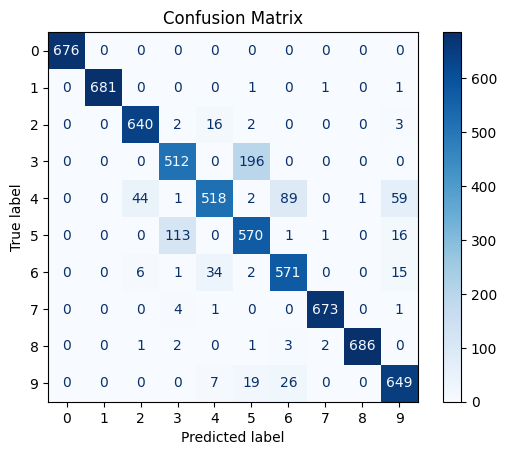

In [ ]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi model MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Melatih model menggunakan data yang telah diskalakan
mlp_model.fit(X_train_scaled, y_train)

# Evaluasi akurasi pada data training
y_train_pred = mlp_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluasi akurasi pada data testing
y_test_pred = mlp_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cetak hasil akurasi
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Menampilkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

### LGBM Model

Training Accuracy: 0.99
Testing Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       1.00      1.00      1.00       684
           2       0.98      0.98      0.98       663
           3       0.84      0.77      0.80       708
           4       0.94      0.89      0.92       714
           5       0.79      0.85      0.82       701
           6       0.94      0.96      0.95       629
           7       1.00      1.00      1.00       679
           8       1.00      0.99      1.00       695
           9       0.93      0.97      0.95       701

    accuracy                           0.94      6850
   macro avg       0.94      0.94      0.94      6850
weighted avg       0.94      0.94      0.94      6850



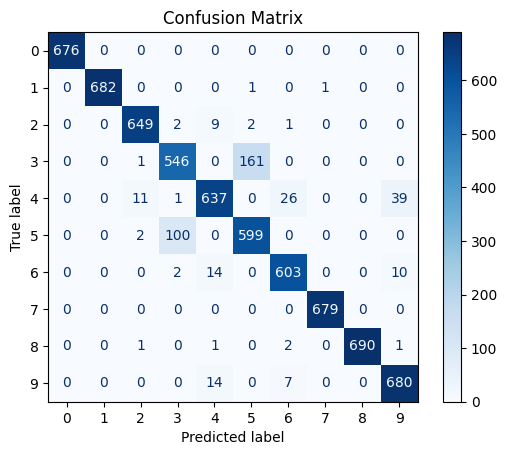

In [84]:
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train_scaled, y_train)

y_train_pred = lgbm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = lgbm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

cm = confusion_matrix(y_test, y_test_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

### Multilayer Autoencoder

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam

##### Create Network Model

In [86]:
# Define autoencoder architecture
input_size = X_train_scaled.shape[1]  # 51 columns in the dataset
hidden_size = 32  # Adjusted for simplicity
code_size = 16  # Latent space size

# Input layer
x = Input(shape=(input_size,))

# Encoder
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)

# Decoder
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

# Autoencoder model
autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

##### Train Model

In [ ]:
# Train the autoencoder
epochs = 100
batch_size = 128

history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test_scaled, X_test_scaled)
)

Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9007e-04 - val_loss: 9.8010e-04
Epoch 8/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8821e-04 - val_loss: 9.4486e-04
Epoch 9/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1674e-04 - val_loss: 9.5044e-04
Epoch 10/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9609e-04 - val_loss: 8.7999e-04
Epoch 11/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2456e-04 - val_loss: 8.4872e-04
E

##### Predict on Test Set

In [ ]:
decoded = autoencoder.predict(X_test_scaled)
print(decoded)

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
[[8.9407873e-01 7.7841061e-01 1.6034754e-08 ... 2.8742731e-04
  2.9903260e-06 9.9997920e-01]
 [8.9337265e-01 7.8288007e-01 7.1056010e-09 ... 2.0815064e-03
  4.4067110e-06 9.9999446e-01]
 [8.8818973e-01 7.7686310e-01 1.6105274e-04 ... 2.0054265e-06
  3.8962244e-06 9.9954915e-01]
 ...
 [8.9910722e-01 7.9052126e-01 2.0392218e-07 ... 8.8799618e-07
  1.0482055e-06 1.0000000e+00]
 [8.8478231e-01 7.6050544e-01 1.8323500e-04 ... 4.1255564e-07
  3.2271532e-07 9.9919379e-01]
 [8.8622940e-01 7.7304626e-01 9.7840340e-05 ... 8.0688818e-07
  1.5823282e-05 9.9982625e-01]]


##### Comparing original data and reconstructed data

In [92]:
import pandas as pd

# Konversi ke DataFrame untuk membandingkan
original = pd.DataFrame(X_test_scaled, columns=X.columns)
reconstructed = pd.DataFrame(decoded, columns=X.columns)

# Lihat sampel pertama
print("Original:\n", original.head())
print("Reconstructed:\n", reconstructed.head())

Original:
    IPV4_SRC_ADDR_1  IPV4_SRC_ADDR_2  IPV4_SRC_ADDR_3  IPV4_SRC_ADDR_4  \
0         0.892308         0.770642         0.004049         0.158974   
1         0.892308         0.770642         0.004049         0.153846   
2         0.892308         0.770642         0.004049         0.164103   
3         0.892308         0.770642         0.004049         0.179487   
4         0.892308         0.770642         0.004049         0.158974   

   L4_SRC_PORT  IPV4_DST_ADDR_1  IPV4_DST_ADDR_2  IPV4_DST_ADDR_3  \
0     0.844368         0.796537         0.658824         0.003922   
1     0.758809         0.796537         0.658824         0.003922   
2     0.720324         0.796537         0.658824         0.003922   
3     0.555689         0.796537         0.658824         0.003922   
4     0.571086         0.796537         0.658824         0.003922   

   IPV4_DST_ADDR_4  L4_DST_PORT  PROTOCOL  L7_PROTO  IN_BYTES   IN_PKTS  \
0         0.000000     0.000809    1.0000  0.000000  0.00005

##### Calculate MSE

In [94]:
mse = mean_squared_error(X_test_scaled.flatten(), decoded.flatten())
print("Reconstruction Error (MSE):", mse)

Reconstruction Error (MSE): 0.00036285343390005754


##### Visualization of Sample Result

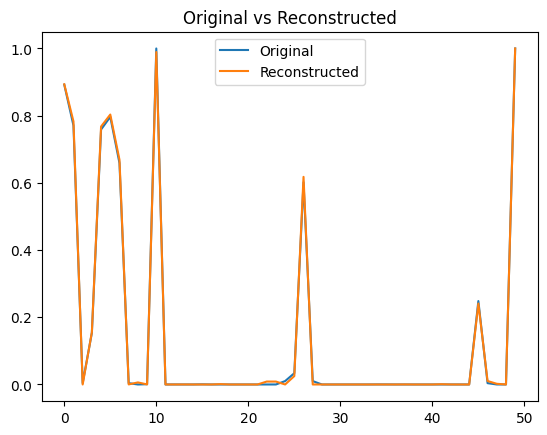

In [ ]:
sample_idx = 1 
plt.plot(X_test_scaled[sample_idx], label="Original")
plt.plot(decoded[sample_idx], label="Reconstructed")
plt.title("Original vs Reconstructed")
plt.legend()
plt.show()

##### Plot The Losses

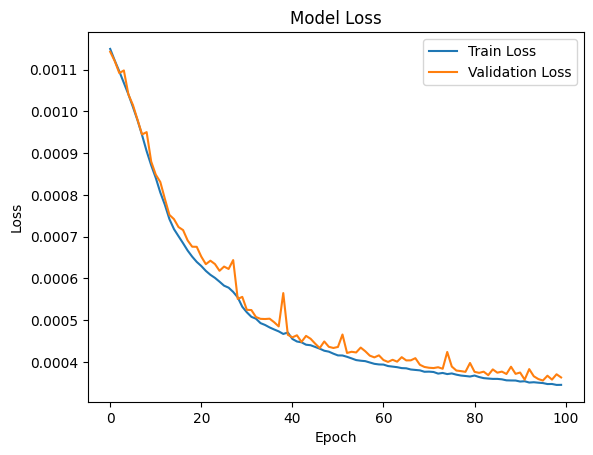

In [90]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()